In [5]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

In [6]:
root_dir = '../../data/komonjo_experiment/200003076/'
image_dir = root_dir + 'experiment_result/experiment_007/result_image/'

In [51]:
img = cv2.imread(image_dir + 'input_output_GT_495_4.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
label = img[:,img.shape[1]*2//3:,:]
pred = img[:,img.shape[1]//3:img.shape[1]*2//3,:]

In [111]:
def preprocess(image):
    image = cv2.GaussianBlur(image, (5, 5), 0)
    _, image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    return image[:,:,0], image[:,:,1], image[:,:,2]

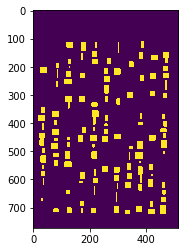

In [114]:
label_c0, label_c1, label_c2 = preprocess(label)
plt.imshow(label_c1)

In [137]:
label_c1_contours, _ = cv2.findContours(label_c1, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
label_c1_copy = np.copy(label_c1)

In [138]:
min_coin_area = 60
large_contours = [cnt for cnt in label_c1_contours if cv2.contourArea(cnt) > min_coin_area]
label_c1_and_contours = cv2.drawContours(label_c1_copy, large_contours, -1, (255,0,0))
print('number of characters: %d' % len(large_contours))

number of characters: 115


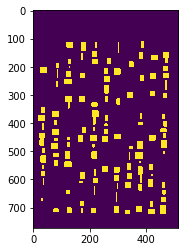

In [139]:
plt.imshow(label_c1_and_contours)

0